In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
air_df = pd.read_csv('Airdata.csv')
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


In [11]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [12]:
#count the number of NaN entries in each attribute of air_df:

print('Number of Maissing Values:')
for col in air_df.columns:
    n_MV= sum(air_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of Maissing Values:
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


In [13]:
#Diagnosis of missing values
# These diagnosis methods must be run for all of the attributes in  the dataset. 
#There are four numerical attributes in the data: Temperature, Humidity, Wind_Direction, and Wind_Speed.
#There is also one DateTime attribute in the data that can be unpacked into four categorical attributes: month, day, hour, and weekday.




In [14]:
#Diagnosing missing values in NO2_Location_A


In [15]:
#Diagnosing missing values based on temperature

#The visual diagnosis is done by comparing the temperature values for the two populations: 


#First, data objects with missing values for NO2_Location_A, and
#Second, data objects with no missing values for NO2_Location_A.

BM_MV = air_df. NO2_Location_A.isna()
BM_MV

0       False
1       False
2        True
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Name: NO2_Location_A, Length: 8784, dtype: bool

In [16]:
MV_labels = ['With Missing Values','Without Missing Values']

box_sr = pd.Series('', index = BM_MV. unique()) 
box_sr


False    
True     
dtype: object

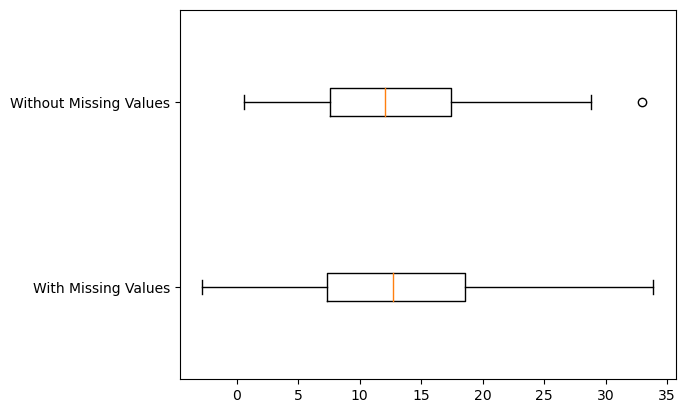

In [17]:
#Boxplot

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature
    
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)
plt.show()

#Looking at the boxplot, we can see that the value of Temperature does not meaningfully change between the two populations.
#That shows that a change in Temperature could not have caused or influenced the occurrence of missing values under NO2_Location_A.

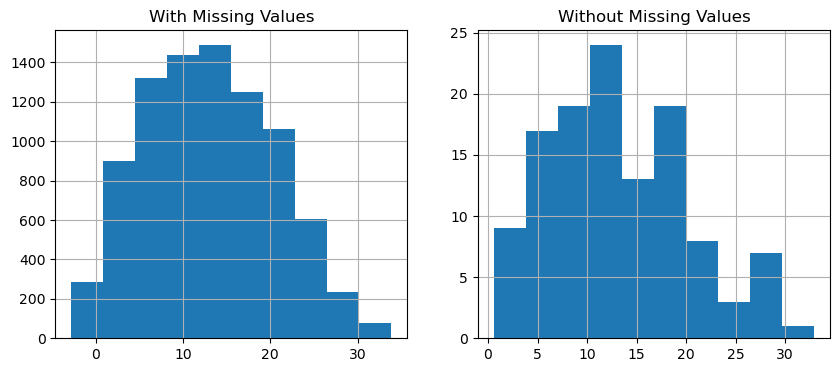

0       False
1       False
2        True
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Name: NO2_Location_A, Length: 8784, dtype: bool

In [20]:
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(),air_df.Temperature.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

BM

In [21]:
#a two-sample t-test. 
#The two-sample t-test evaluates whether the value of a numerical attribute is significantly 
#different among the two groups. The two groups here are the data objects having missing 
#values under NO2_Location_A and the data objects without missing values under NO2_Location_A.


from scipy.stats import ttest_ind
BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature)

TtestResult(statistic=0.05646499065315542, pvalue=0.9549726689684548, df=8782.0)

In [23]:
####The p-value of the t-test is very large—0.95 out of 1, which means we do not have any reason 
####to suspect the value of Temperature can be meaningfully different between the two groups. 
####This conclusion confirms the one that we arrived at using boxplots and histograms. 

In [28]:
#### Diagnosing the missing values based on all the numerical attributes 
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Diagnosis Analysis of Missing Values for Temperature:
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [27]:
from scipy.stats import ttest_ind 


    
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Misssing Values'}
    
    
    labels =[]
 

    box_sr = pd.Series('',index = BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = df[BM][str_att_name].dropna()
    labels.append(MV_labels[poss])
    
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

NameError: name 'df' is not defined

In [29]:
#Diagnosing the missing values based on weekday
air_df.DateTime = pd.to_datetime(air_df.DateTime)
air_df['month'] = air_df.DateTime.dt.month
air_df['day'] = air_df.DateTime.dt.day
air_df['hour'] = air_df.DateTime.dt.hour
air_df['weekday'] = air_df.DateTime.dt.day_name()

air_df


,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


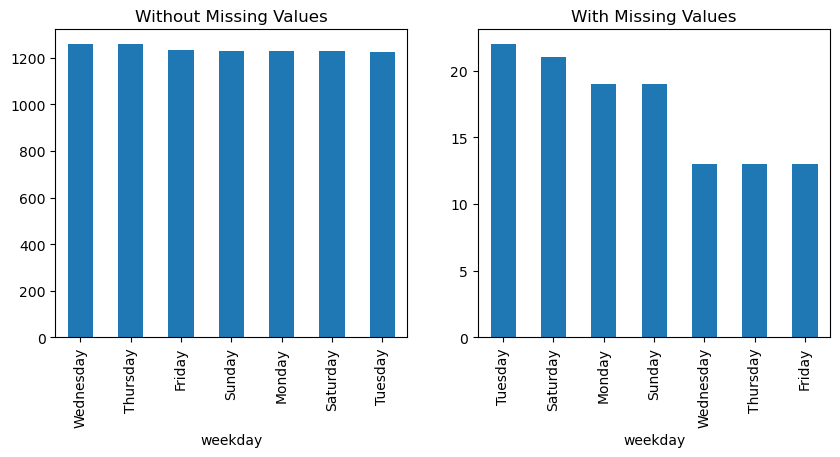

In [30]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['Without Missing Values','With Missing Values']

plt.figure(figsize=(10,4))
for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()

In [ ]:
#we can see that the missing values could have happened 
#randomly and we don't have a meaningful trend to believe there is a systematic reason for 
#the missing values happening due to a change of the value of airt_df.weekday


In [31]:
from scipy.stats import chi2_contingency
BM_MV = air_df.NO2_Location_A.isna()
contigency_table = pd.crosstab(BM_MV,air_df.weekday)
contigency_table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [32]:
chi2_contingency(contigency_table)

Chi2ContingencyResult(statistic=6.048964133655503, pvalue=0.41772751510388023, dof=6, expected_freq=array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
        1254.62295082, 1230.95081967, 1254.62295082],
       [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
          17.37704918,   17.04918033,   17.37704918]]))

In [ ]:
#Results 
#Having a p-value of 0.4127 confirms the observation, 
#which is that there is no relationship between the occurrence of missing values in 
#air_df.NO2_Location_A and the value of weekday, and the fact that the missing 
#values happened the way they did could have just been a random chance

In [ ]:
#Diagnosing the missing values based on all the categorical attributes

In [33]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for month:


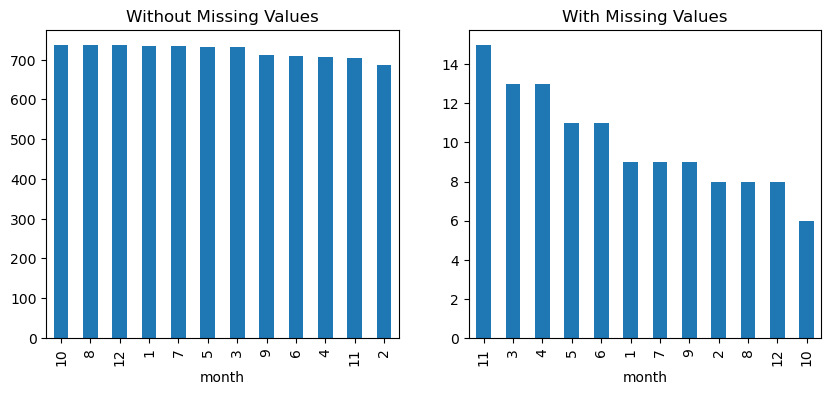

p-value of Chi_squared test: 0.7096565832929861
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


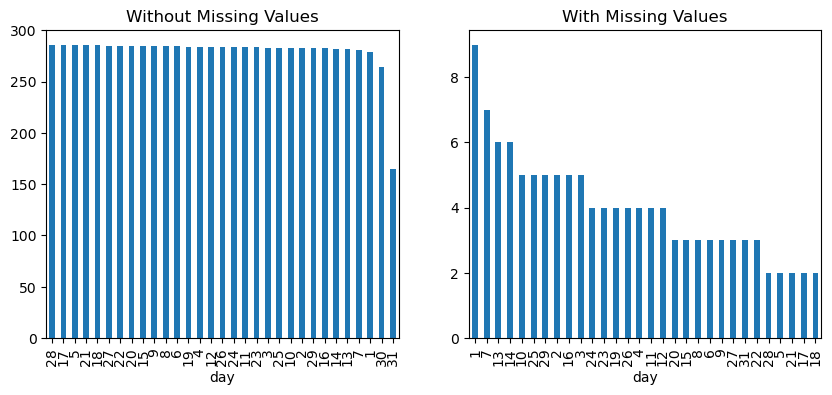

p-value of Chi_squared test: 0.8040640724986007
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


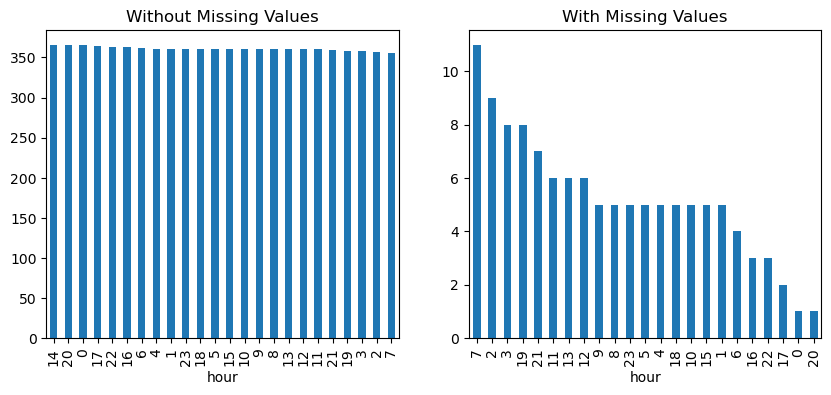

p-value of Chi_squared test: 0.12725321642668141
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


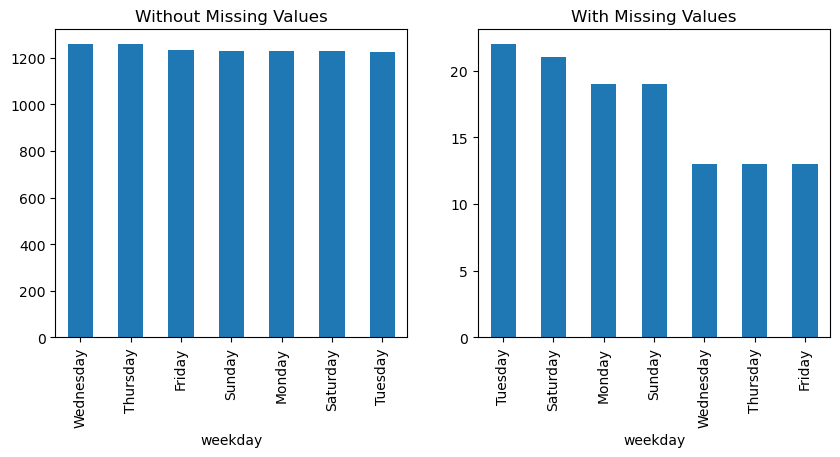

p-value of Chi_squared test: 0.41772751510388023
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [34]:
categorical_attributes = ['month', 'day','hour', 'weekday']

BM_MV = air_df.NO2_Location_A.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')